# Unveiling the Secrets of Wine Quality

Bypassing traditional tasting methods, this project employs data analysis to predict the quality of wine based on its chemical features.

In [1]:
from ucimlrepo import fetch_ucirepo 
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

## 1. Extract Data

### 1.1 Using Python Library

In [2]:
'''# fetch dataset 
wine_quality = fetch_ucirepo(id=186) 
  
# data (as pandas dataframes) 
X = wine_quality.data.features 
y = wine_quality.data.targets 
  
# metadata 
print(wine_quality.metadata) 
  
# variable information 
print(wine_quality.variables) '''


'# fetch dataset \nwine_quality = fetch_ucirepo(id=186) \n  \n# data (as pandas dataframes) \nX = wine_quality.data.features \ny = wine_quality.data.targets \n  \n# metadata \nprint(wine_quality.metadata) \n  \n# variable information \nprint(wine_quality.variables) '

In [3]:
'''
df_wine_quality_features = pd.DataFrame(wine_quality['data']['features'])
df_wine_quality_targets = pd.DataFrame(wine_quality['data']['targets'])
df_wine_quality = pd.concat([df_wine_quality_features, df_wine_quality_targets], axis=1, join='inner')

df_wine_quality'''

"\ndf_wine_quality_features = pd.DataFrame(wine_quality['data']['features'])\ndf_wine_quality_targets = pd.DataFrame(wine_quality['data']['targets'])\ndf_wine_quality = pd.concat([df_wine_quality_features, df_wine_quality_targets], axis=1, join='inner')\n\ndf_wine_quality"

### 1.2 Reading from csv

In [4]:
df_white_wine = pd.read_csv("data/winequality-white.csv", sep=";")

df_red_wine = pd.read_csv("data/winequality-red.csv",sep=";")

df_red_wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [5]:
df_white_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [6]:
df_red_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


## 2. Clean Data

### 2.1 Check for missing values

We are going to check if there are empty values.

In [7]:
df_red_wine.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [8]:
df_white_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [9]:
df_red_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [10]:
df_red_wine.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

**Observations from Checking Missing Values:**
1. There are no missing data in either dataset.
2. All feature columns are of the float type, and the target column is an integer.

### 2.2 Check for outliers

In [11]:
df_white_wine.wine_type = "White Wine"
df_red_wine.wine_type = "Red Wine"

def get_wine_str(wine_type_df):
    return getattr(wine_type_df, 'wine_type', "Unknown Wine")


In [12]:
#scatterplots

def create_scatter_plot(wine_type_df):
    wine_type = get_wine_str(wine_type_df)

    features_columns = wine_type_df.drop(columns=['quality']).columns.tolist()
    
    # Set up the matplotlib figure
    rows, cols = 3, 4

    fig, axs = plt.subplots(rows, cols, figsize=(20, 15))

    # Create a scatter plot for each feature column against the target
    for i, col in enumerate(features_columns):
        row = i // cols
        col_num = i % cols
        sns.scatterplot(data=wine_type_df, x='quality', y=col, color='green', marker='x',ax=axs[row, col_num])
        axs[row, col_num].set_title(f'{col} vs. Target')

    
    fig.suptitle(f"Scatter Plots for {wine_type}", fontsize=16)
    plt.tight_layout()
    plt.show()


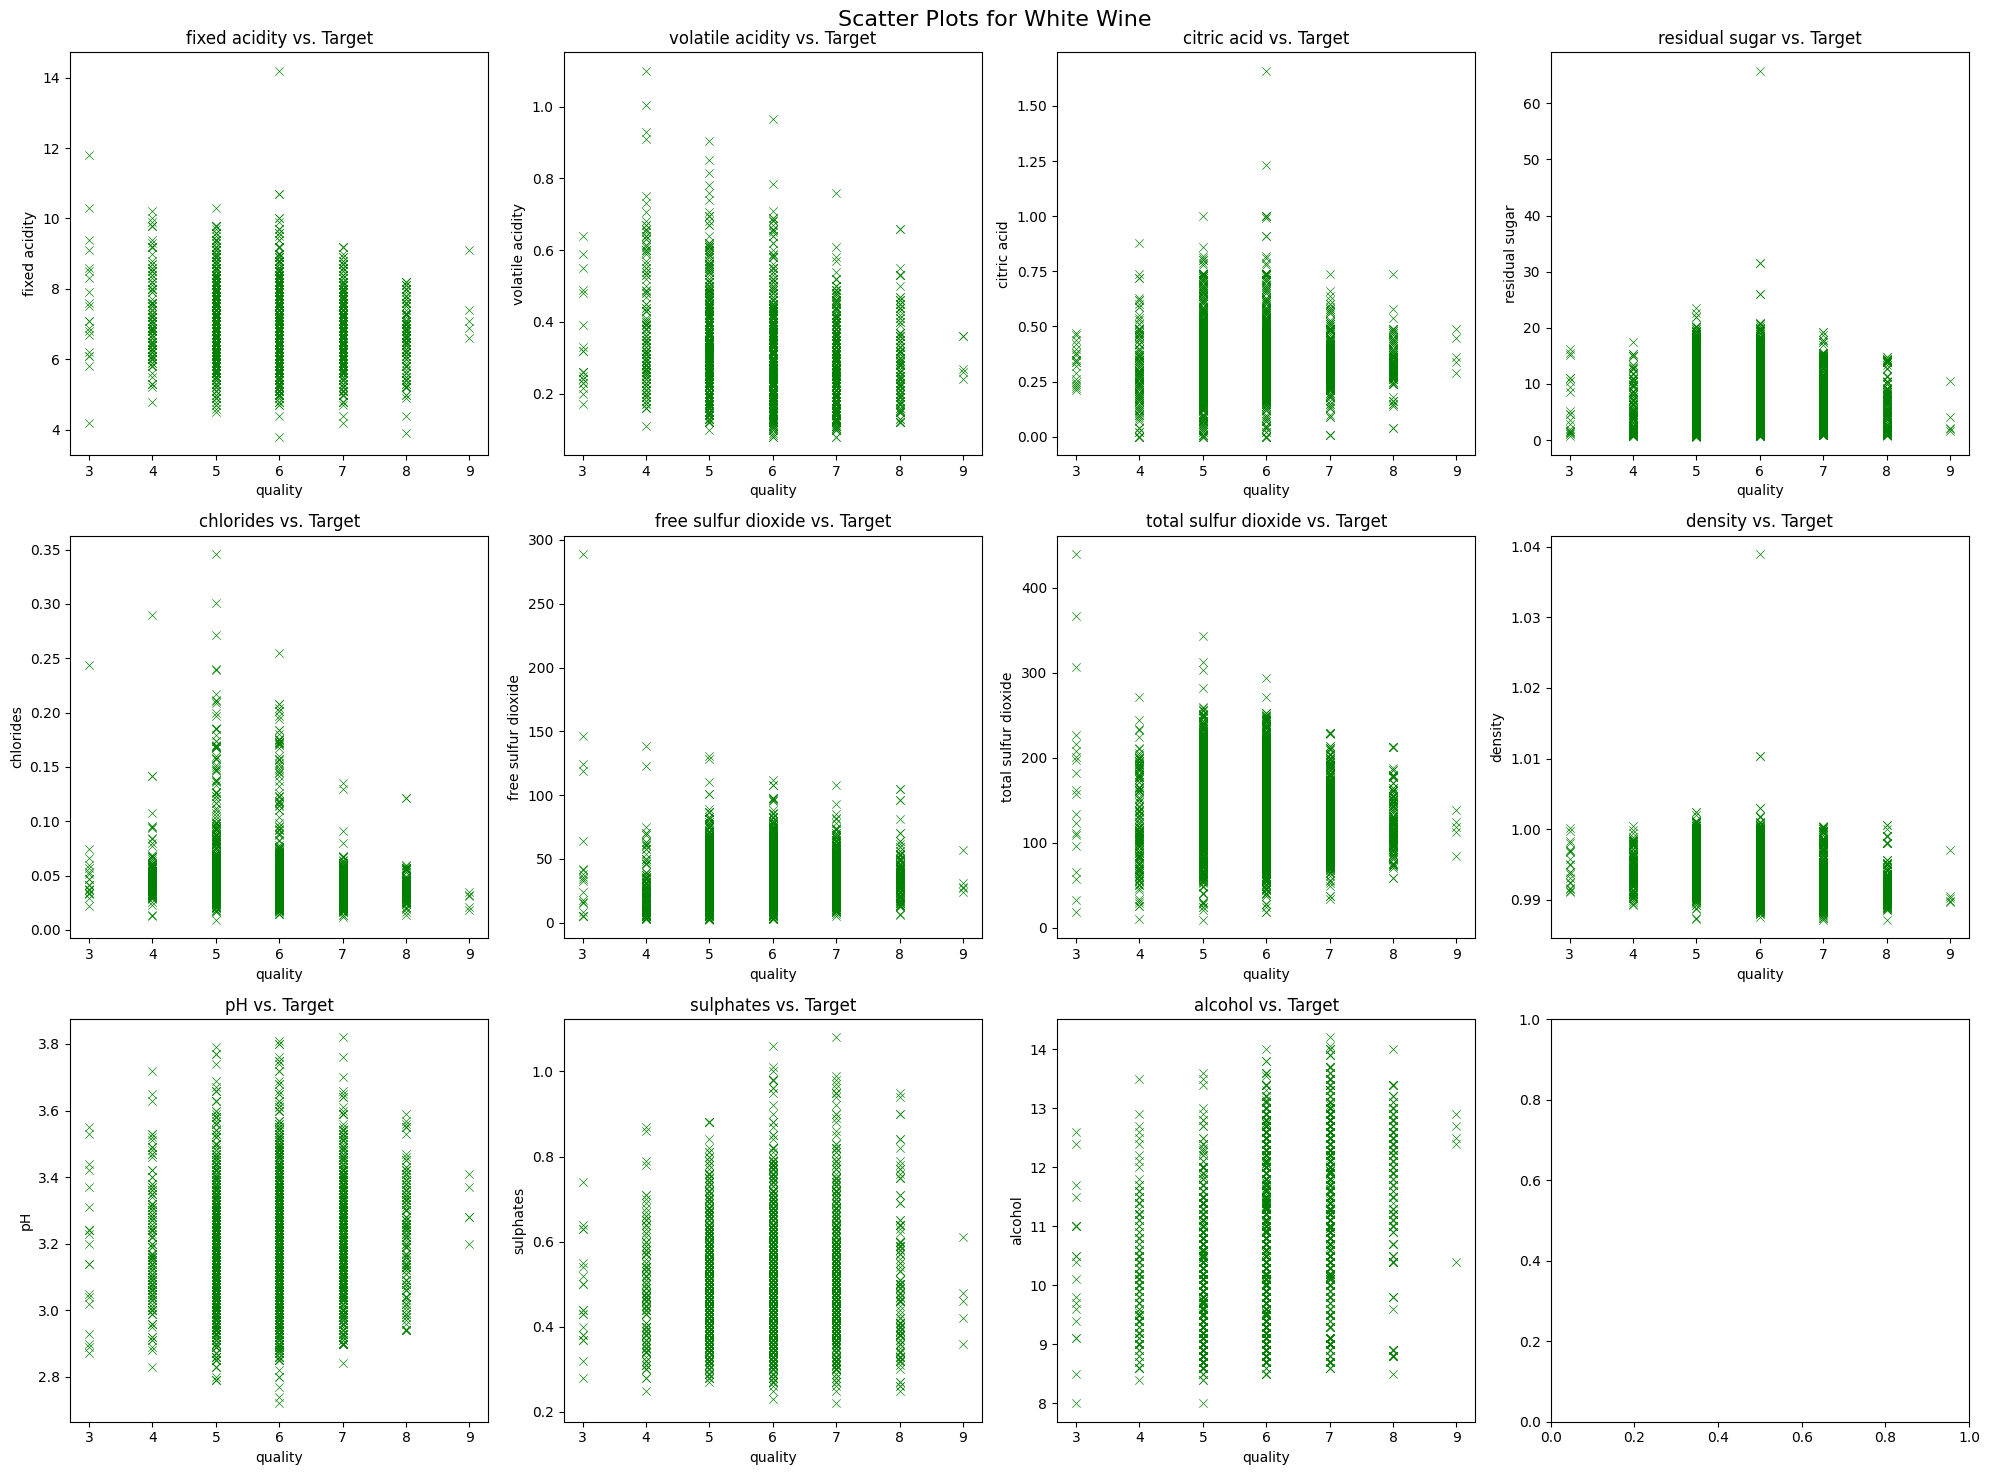

In [13]:
create_scatter_plot(df_white_wine)

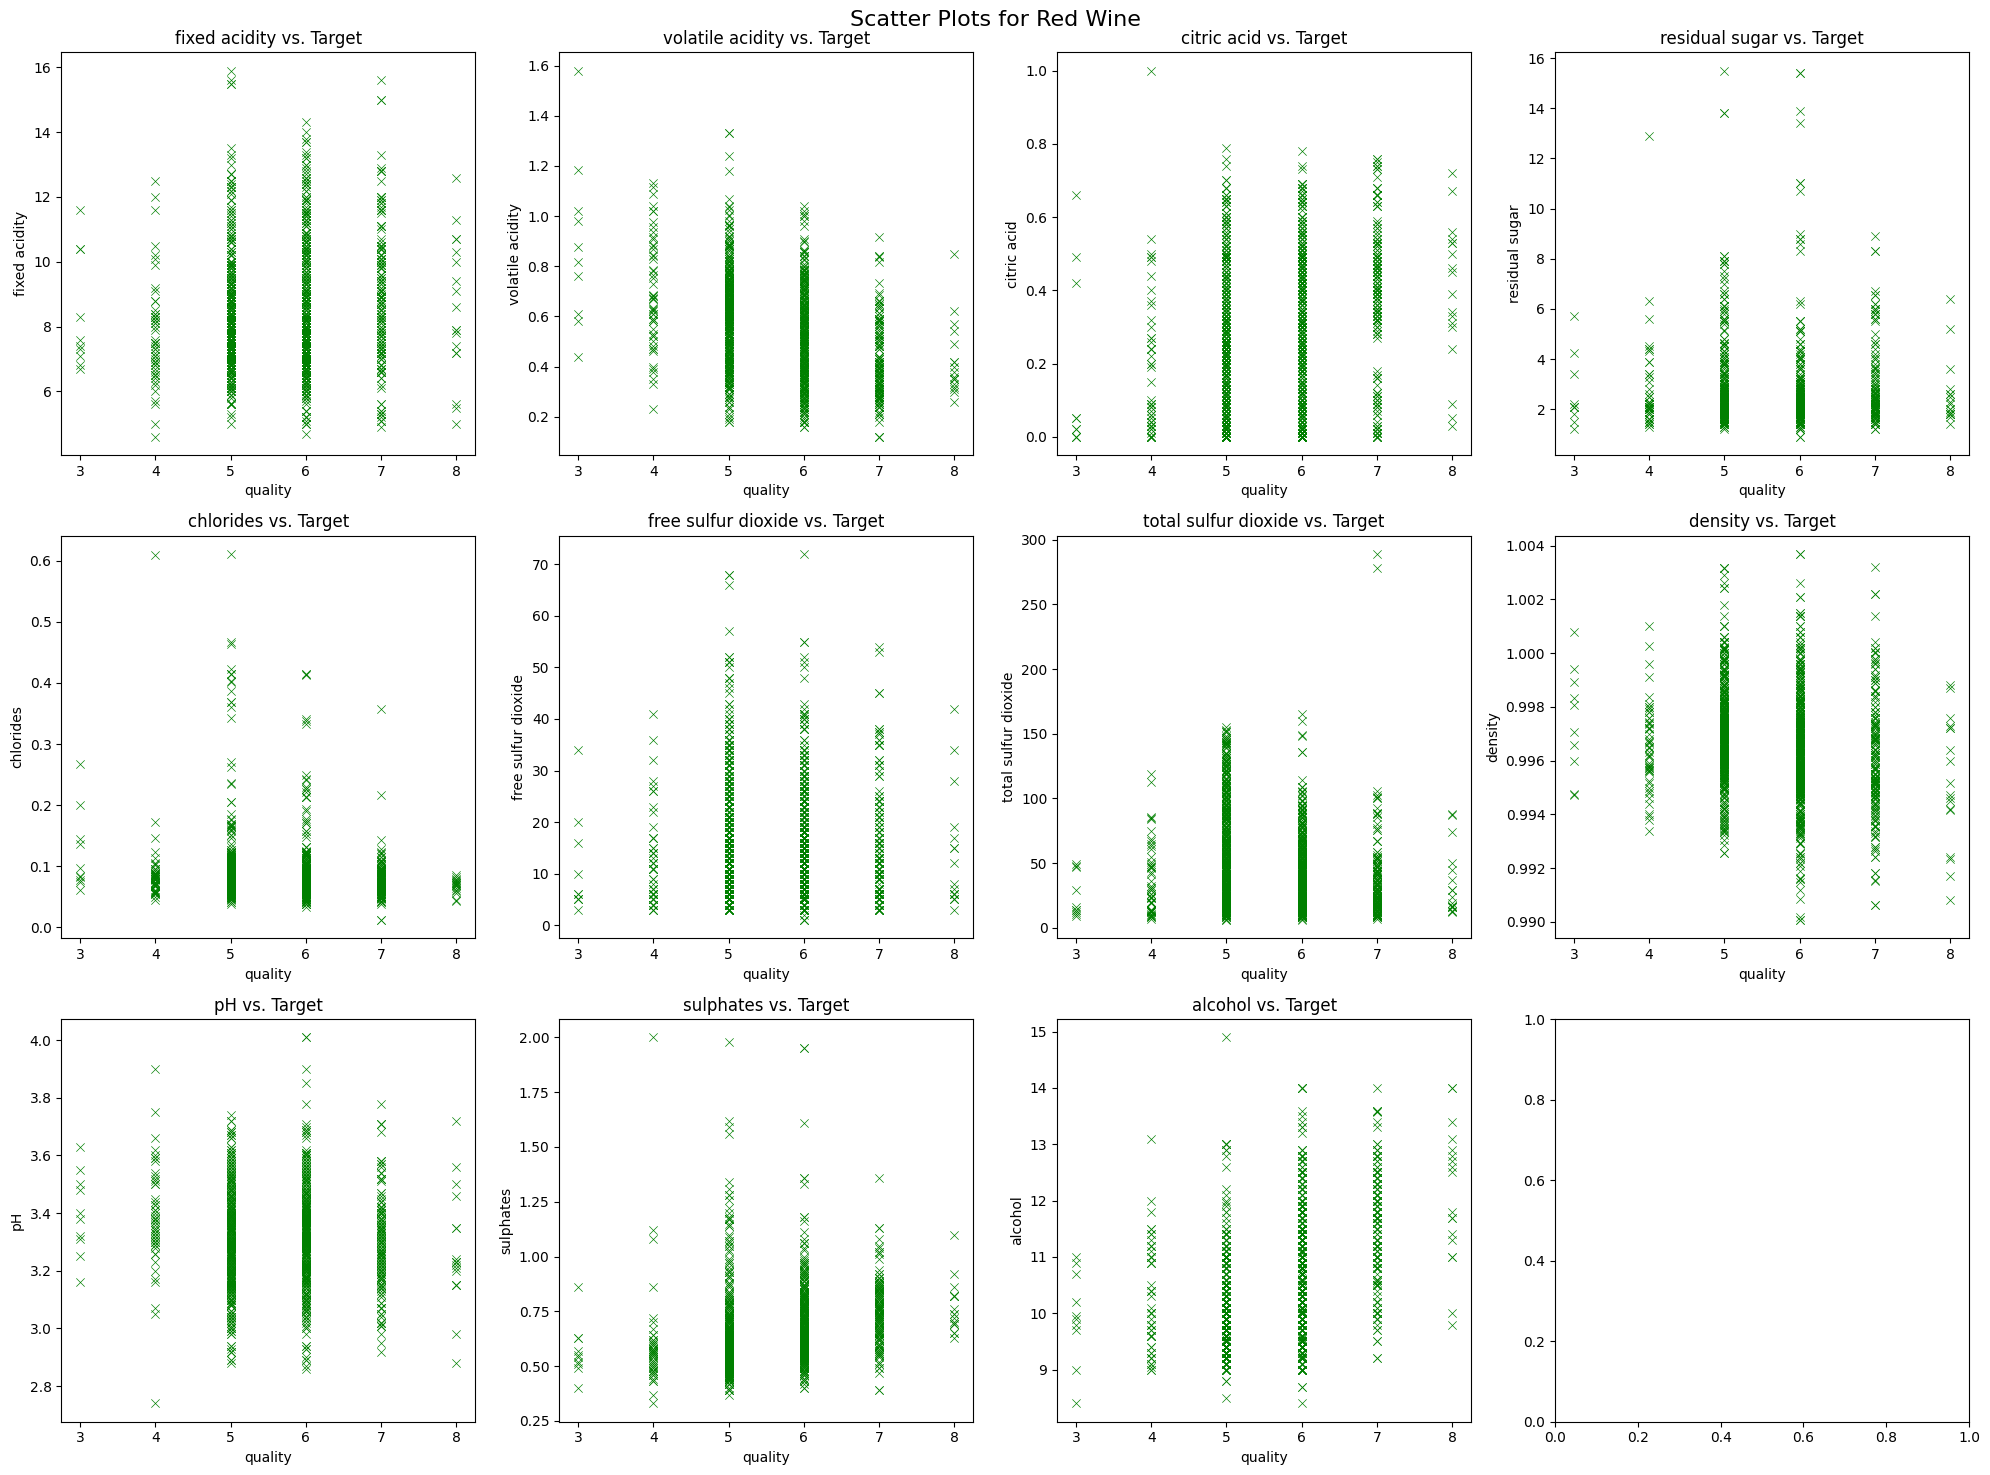

In [14]:
create_scatter_plot(df_red_wine)

**Observations from Scatter Plots**

1. **White Wine: Outliers in Lower Quality Wine**: Notable outliers are present in lower quality wines. Examples include volatile acidity in quality 4, citric acid in quality 6, and chlorides in quality 5. These outliers may be less concerning when focusing solely on higher quality wines but are important for comprehensive analysis.
2. **Red Wine: Scattered Outliers**: Outliers are more dispersed across quality levels. There are notable outliers in higher quality wines, such as sulfur dioxide in quality 7, indicating diverse characteristics across quality categories.

In summary, both datasets exhibit outliers across different quality levels, with a more scattered distribution in the Red Wine dataset. 

We will continue to create box plots to understand the outliers.

In [15]:
def create_box_plot(wine_type_df):
    feature_columns = wine_type_df.drop(columns=['quality']).columns.tolist()
    # Set up the matplotlib figure and axes for a 3x3 grid
    fig, axs = plt.subplots(3, 4, figsize=(20, 15))  # Adjust the size as needed

    # Flatten the array of axes to make it easier to iterate over
    axs = axs.flatten()

    for i, column in enumerate(feature_columns): 
        sns.boxplot(x='quality', y=column, hue='quality', data=wine_type_df, ax=axs[i], palette="pastel", legend=False)
        axs[i].set_title(f'{column} vs quality')

    fig.suptitle(f"Box Plots for {get_wine_str(wine_type_df)}", fontsize=16)
    plt.show()

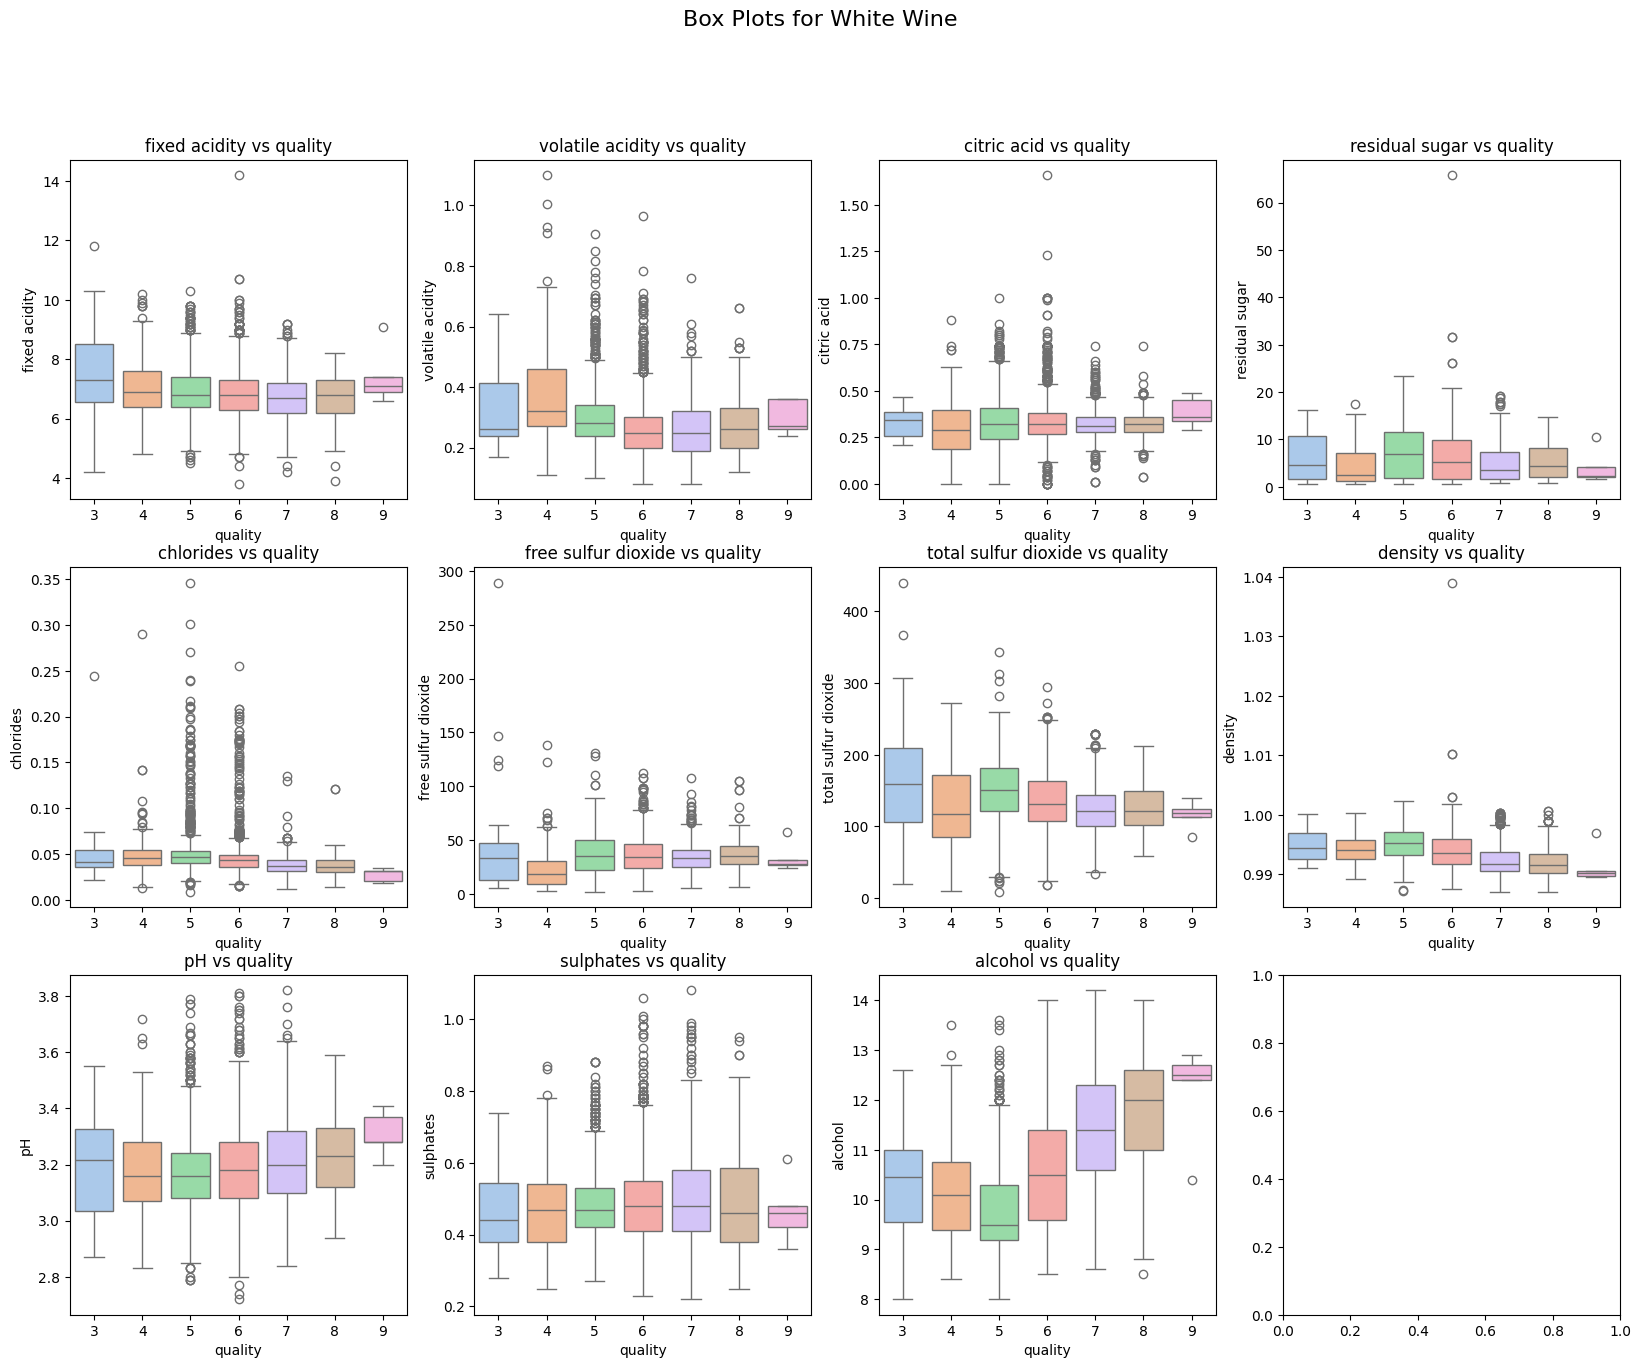

In [16]:
create_box_plot(df_white_wine)

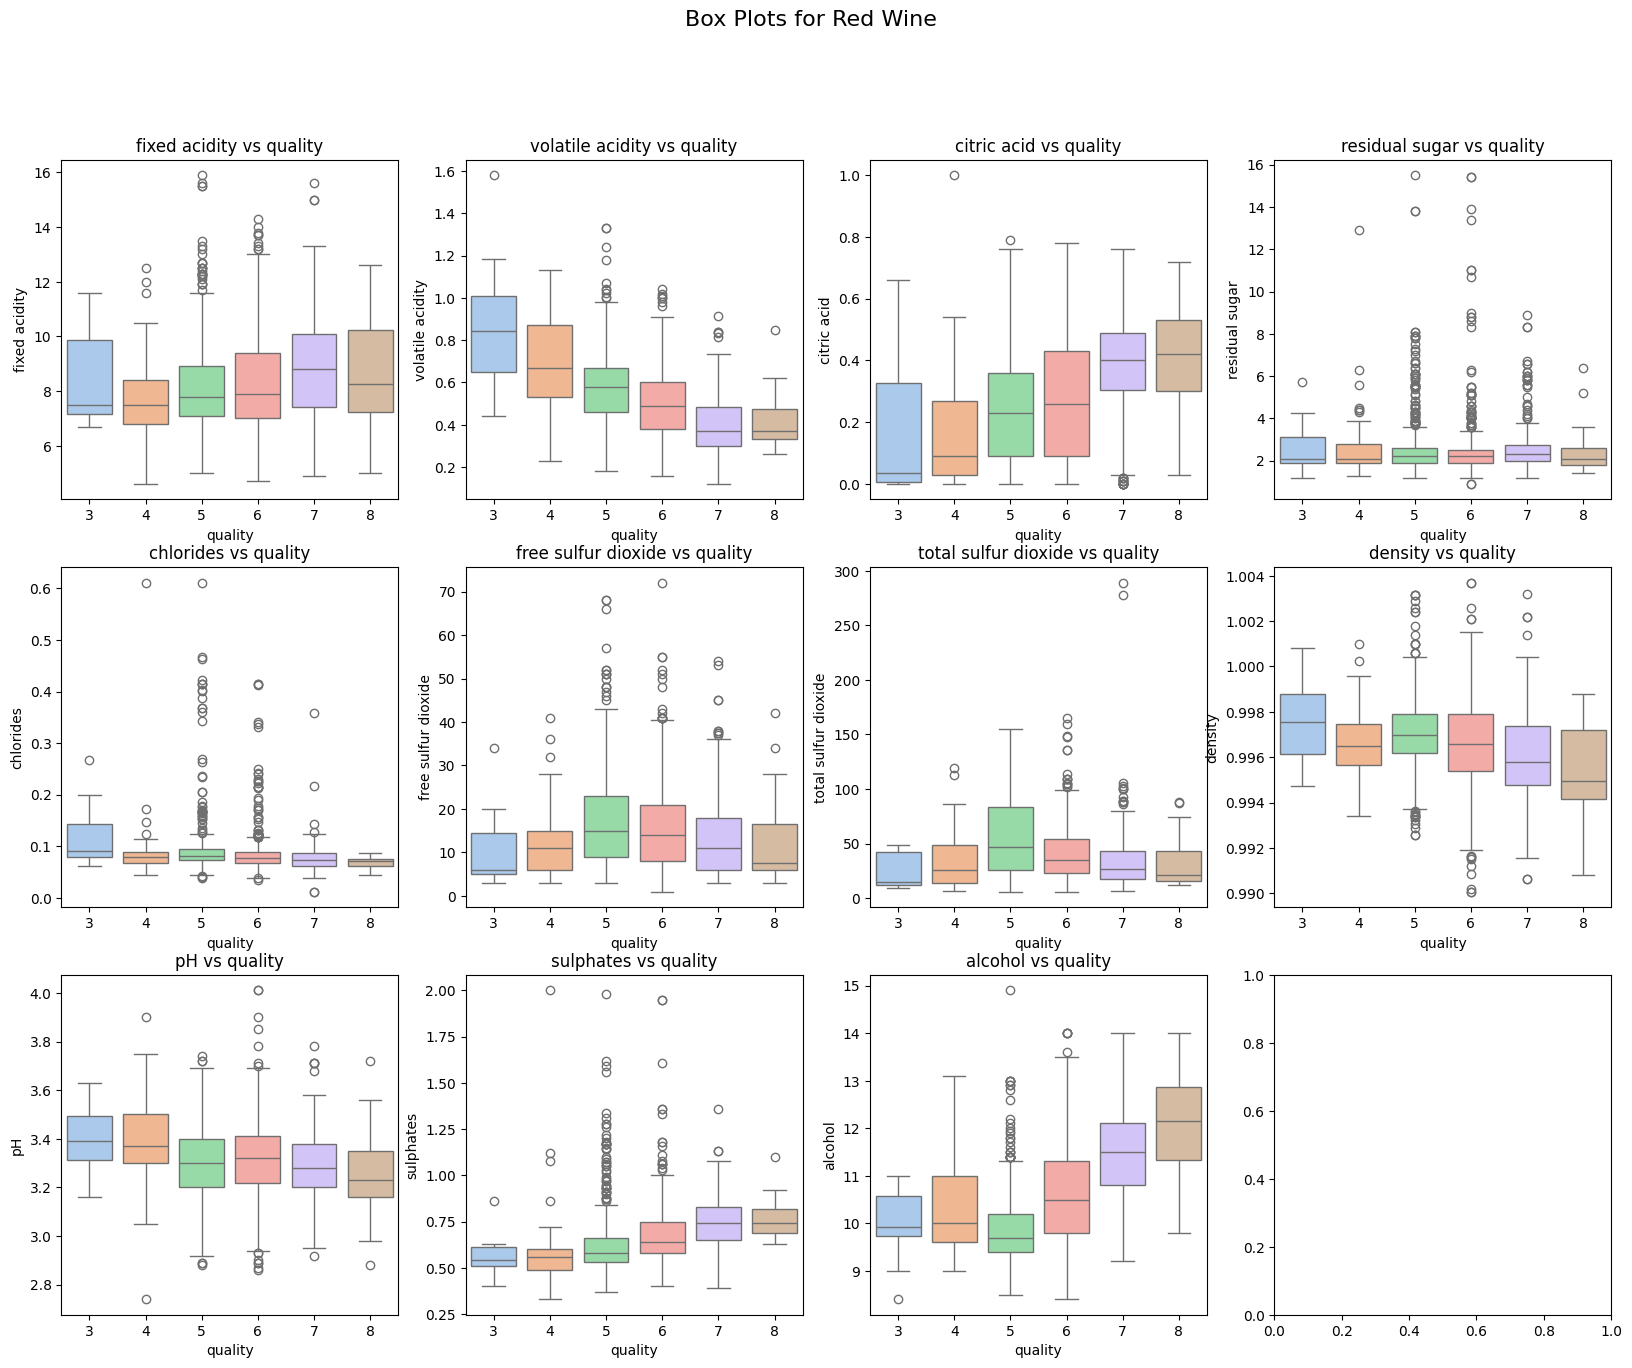

In [17]:
create_box_plot(df_red_wine)

**Observations from Box Plots**
1. It's hard to decide should we delete outliers or not based on these plots. 
2. We will continue to calculate the Z-score to see the outliers out of 99.7% confidence interval.

In [18]:
from scipy.stats import zscore

def calculate_z_score(wine_type_df):
    z_scores_df = wine_type_df.copy()

    print(f"Z Score of {get_wine_str(wine_type_df)}:\n")

    for col in wine_type_df.columns:
        if col != 'quality':
            z_scores_df[col + ' Z-score'] = zscore(wine_type_df[col])
            
            outliers = abs(z_scores_df[col + ' Z-score']) > 3
            print(f"Outliers in {col}: {outliers.sum()}")
    
    return z_scores_df


In [19]:
z_score_red_wine = calculate_z_score(df_red_wine)

Z Score of Red Wine:

Outliers in fixed acidity: 12
Outliers in volatile acidity: 10
Outliers in citric acid: 1
Outliers in residual sugar: 30
Outliers in chlorides: 31
Outliers in free sulfur dioxide: 22
Outliers in total sulfur dioxide: 15
Outliers in density: 18
Outliers in pH: 8
Outliers in sulphates: 27
Outliers in alcohol: 8


In [20]:
z_score_white_wine = calculate_z_score(df_white_wine)

Z Score of White Wine:

Outliers in fixed acidity: 46
Outliers in volatile acidity: 81
Outliers in citric acid: 85
Outliers in residual sugar: 9
Outliers in chlorides: 102
Outliers in free sulfur dioxide: 32
Outliers in total sulfur dioxide: 12
Outliers in density: 3
Outliers in pH: 32
Outliers in sulphates: 48
Outliers in alcohol: 0


**Observations from Z Score**
1. **Red Wine**:
   1. Few outliers overall.
   2. Residual sugar(30), chlorides(31), and sulphates(27) show a moderate number of outliers.
2. **White Wine**: 
   1. More outliers overall.
   2. Chlorides(102), citric acid(85), and volatile acidity(81) show a high number of outliers.
3. We will decide wheter we keep or delete outliers when building the prediction model.


## 3. Exploratory Data Analysis (EDA)

Here we want to create QQ Plots to understand if the features follow normal distribution or not.

In [21]:
## Q-Q 
# boxplot - log scale 

def create_qq_plot(wine_type_df):
    wine_type = get_wine_str(wine_type_df)

    # Select only the numerical columns from the DataFrame
    numerical_columns = wine_type_df.select_dtypes(include=[np.number]).columns

    # Set up the matplotlib figure and axes for a 3x3 grid
    fig, axs = plt.subplots(3, 4, figsize=(20, 15))  # Adjust the size as needed

    # Flatten the array of axes to make it easier to iterate over
    axs = axs.flatten()

    # Loop over the numerical columns and create a Q-Q plot for each
    for i, column in enumerate(numerical_columns):  
        data = wine_type_df[column]
        stats.probplot(data, dist="norm", plot=axs[i])
        axs[i].set_title(f'Q-Q plot for {column}')

    # Adjust layout to prevent overlap
    fig.suptitle(f"QQ Plots for {wine_type}", fontsize=16)
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

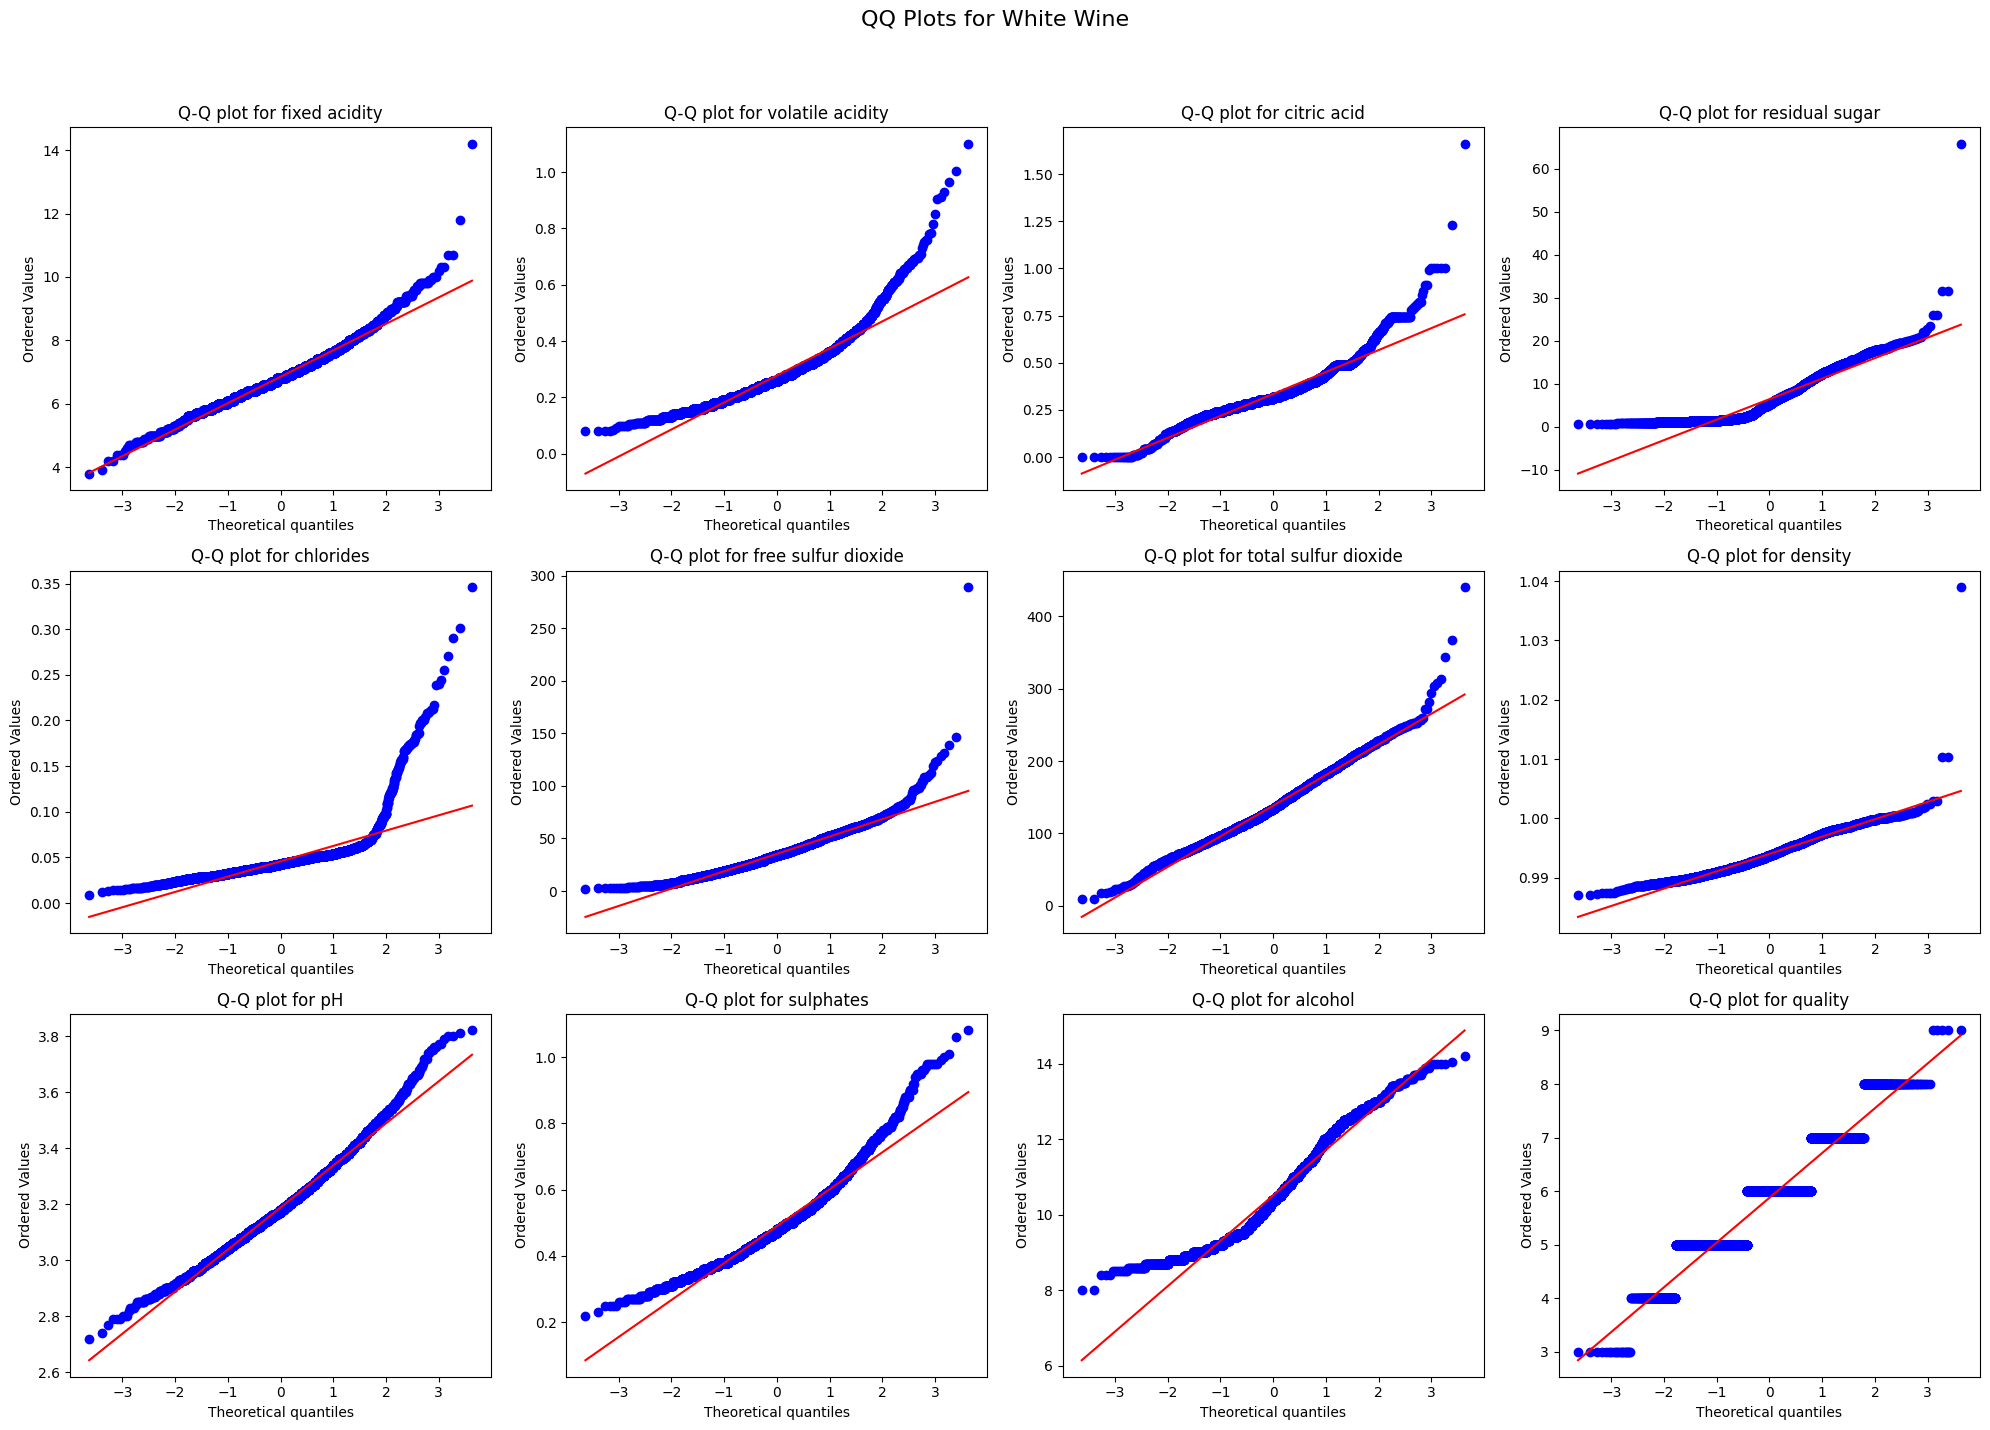

In [22]:
create_qq_plot(df_white_wine)

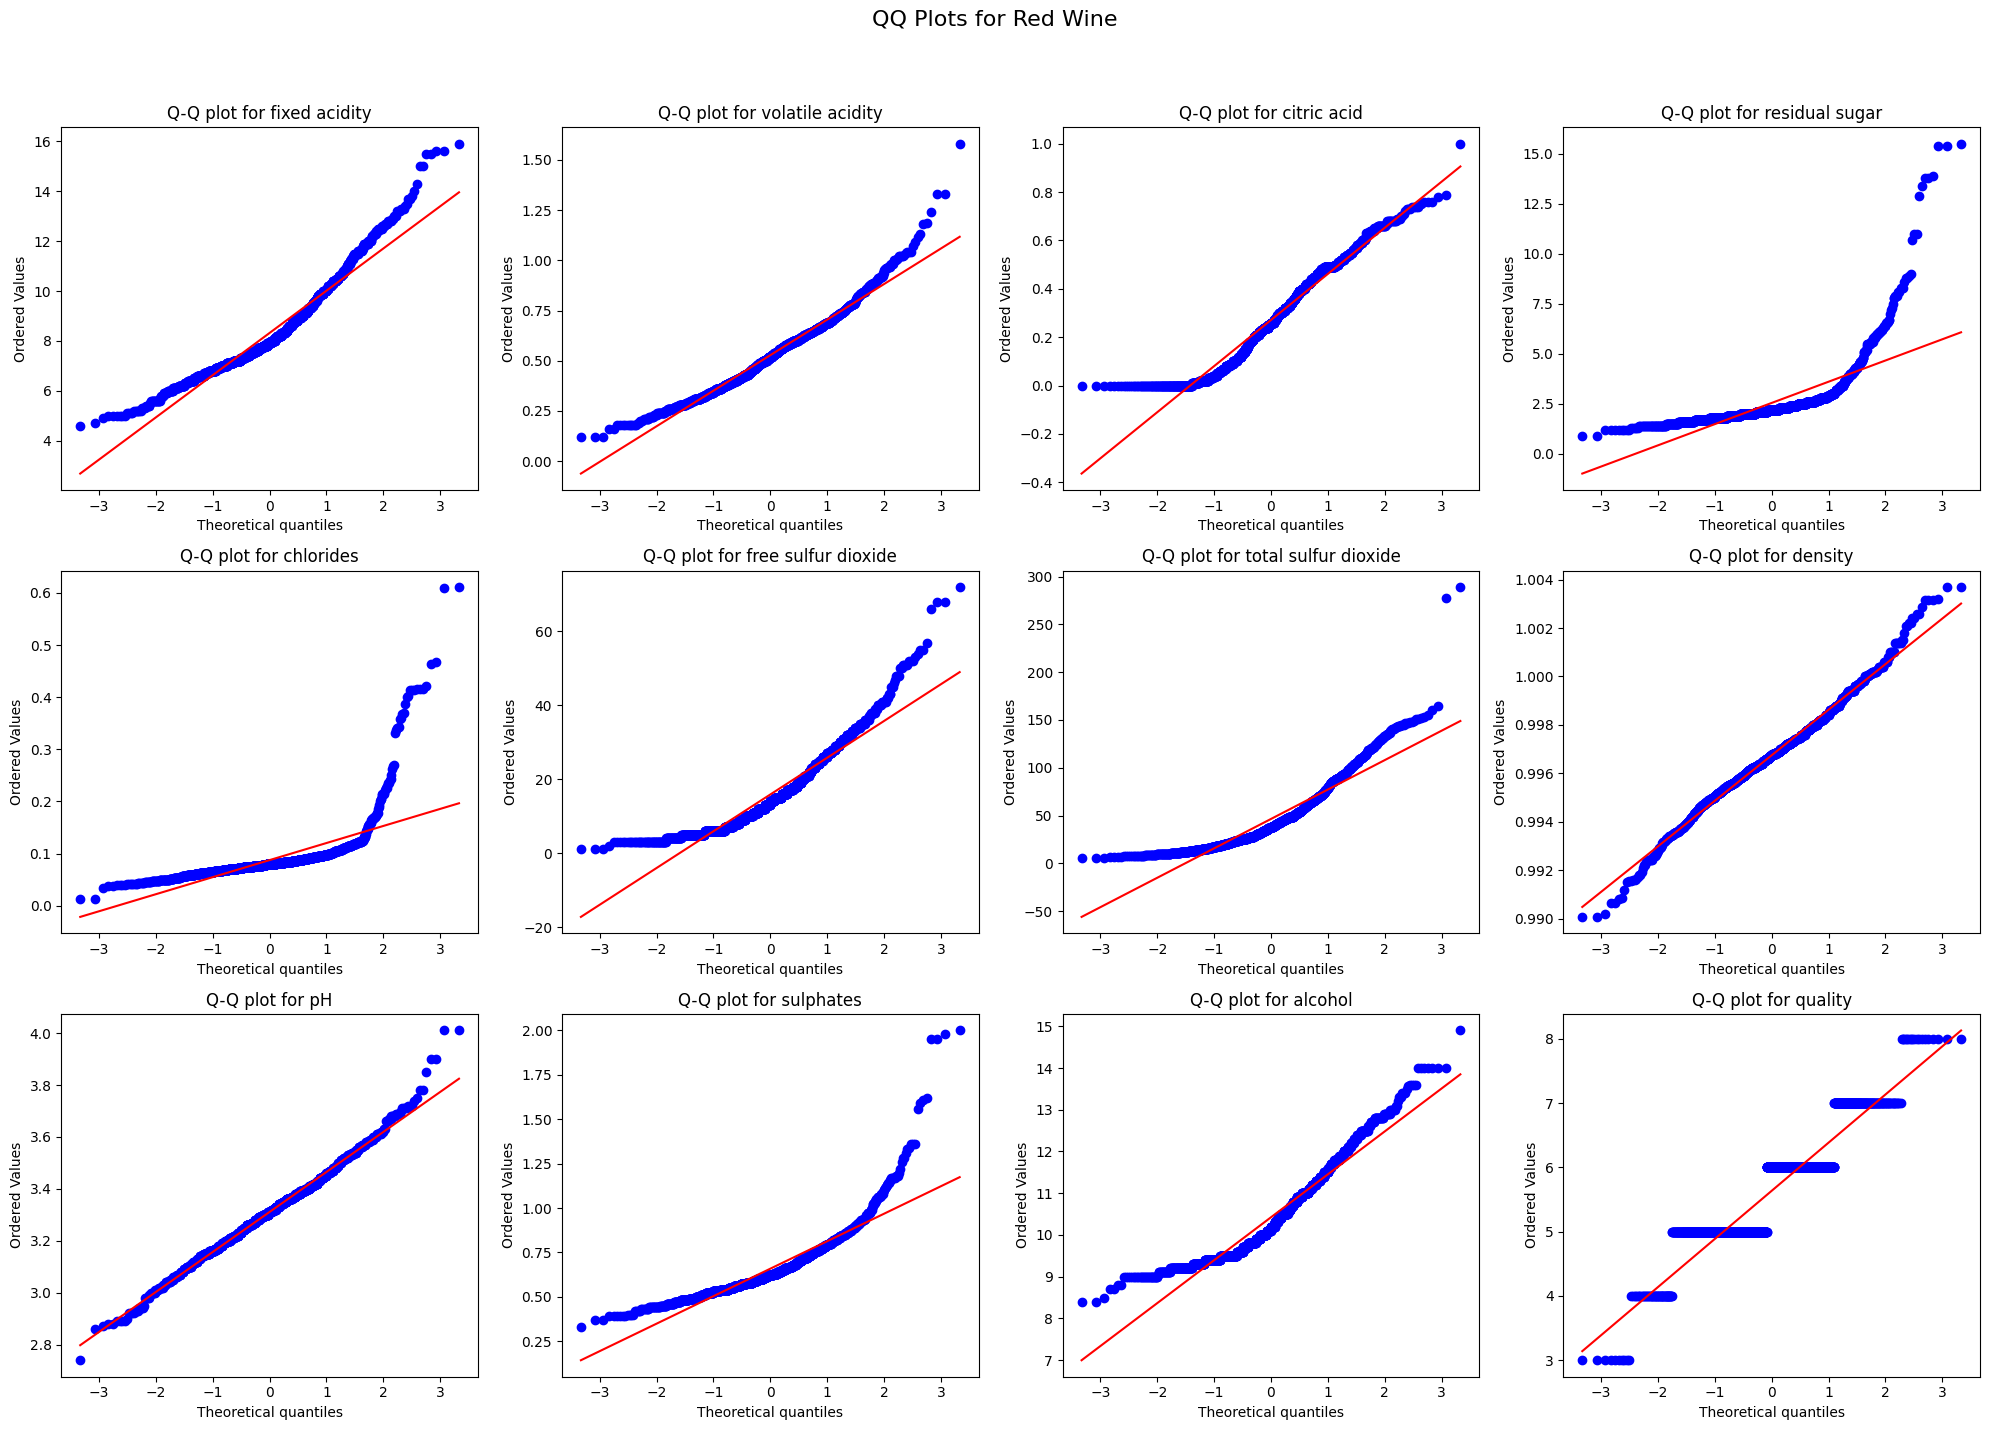

In [23]:
create_qq_plot(df_red_wine)

### Observations from QQ Plots of Red and White Wine Datasets:

1. **Right Skewness**:
   - **Red Wine**: `Residual Sugar` and `Alcohol` show deviations in the lower quantiles.
   - **White Wine**: Similar to Red Wine, `Residual Sugar` and `Alcohol` show deviations in the lower quantiles.

2. **Left Skewness**:
   - **Red Wine**: `Free Sulfur Dioxide`, `Chlorides`, and `Sulphates` show deviations in the upper quantiles.
   - **White Wine**: `Volatile Acidity`, `Chlorides`, and `Sulphates` show deviations in the upper quantiles.

3. **Implications for Data Processing**:
   - The observed skewness in both datasets suggests the need for normalization transformations. We will continue to calculate skewness coefficient. 
   - Techniques like logarithmic or Box-Cox transformations may be beneficial to address these deviations and improve the homogeneity of the data.

In [24]:
def calculate_skewness_coefficient(wine_type_df):
    print(f"The skewness coefficient of {get_wine_str(wine_type_df)}:\n")

    for column in wine_type_df.columns:  
        skewness = round(wine_type_df[column].skew(),2)
        print(f"{column}: {skewness}")


In [25]:
calculate_skewness_coefficient(df_white_wine)

The skewness coefficient of White Wine:

fixed acidity: 0.65
volatile acidity: 1.58
citric acid: 1.28
residual sugar: 1.08
chlorides: 5.02
free sulfur dioxide: 1.41
total sulfur dioxide: 0.39
density: 0.98
pH: 0.46
sulphates: 0.98
alcohol: 0.49
quality: 0.16


In [26]:
calculate_skewness_coefficient(df_red_wine)

The skewness coefficient of Red Wine:

fixed acidity: 0.98
volatile acidity: 0.67
citric acid: 0.32
residual sugar: 4.54
chlorides: 5.68
free sulfur dioxide: 1.25
total sulfur dioxide: 1.52
density: 0.07
pH: 0.19
sulphates: 2.43
alcohol: 0.86
quality: 0.22


**Observations from the skewness coefficient**

1. **White Wine**:
   - Chlorides (5.02): Highly skewness. 
   - Volatile Acidity (1.58), Citric Acid (1.28), Residual Sugar (1.08), Free Sulfur Dioxide (1.41): : Moderate skewness.
2. **Red Wine**:
   - Residual Sugar (4.54) and Chlorides (5.68): Highly skewness
   - Free Sulfur Dioxide (1.25), Total Sulfur Dioxide (1.52), Sulphates (2.43): Moderate skewness.
3. **Conclusion**:
   1. For features of highly skewness, we need to do log transformation. 
   2. For features of moderate skewness, we might do log transformation, depending on their importance.

Create heatmaps to understant the relationship between features and wine quality score.

In [27]:
def create_heat_map(wine_type_df):
       correlation_matrix = wine_type_df.corr()
       plt.figure(figsize=(15, 10))
       sns.heatmap(correlation_matrix, annot=True, cmap='seismic',linewidths=.5, vmax=1, vmin=-1)

       plt.title(f'Correlation matrix for {get_wine_str(wine_type_df)}')
       plt.xticks(rotation=45)
       plt.yticks(rotation=45)
       plt.show()

def create_clustermap(wine_type_df):
       correlation_matrix = wine_type_df.corr()
       plt.figure(figsize=(15, 15))
       sns.clustermap(correlation_matrix, annot=True, cmap='seismic',linewidths=.5, vmax=1, vmin=-1)

       plt.title(f'Correlation matrix for {get_wine_str(wine_type_df)}')
       plt.xticks(rotation=45)
       plt.yticks(rotation=45)
       plt.show()


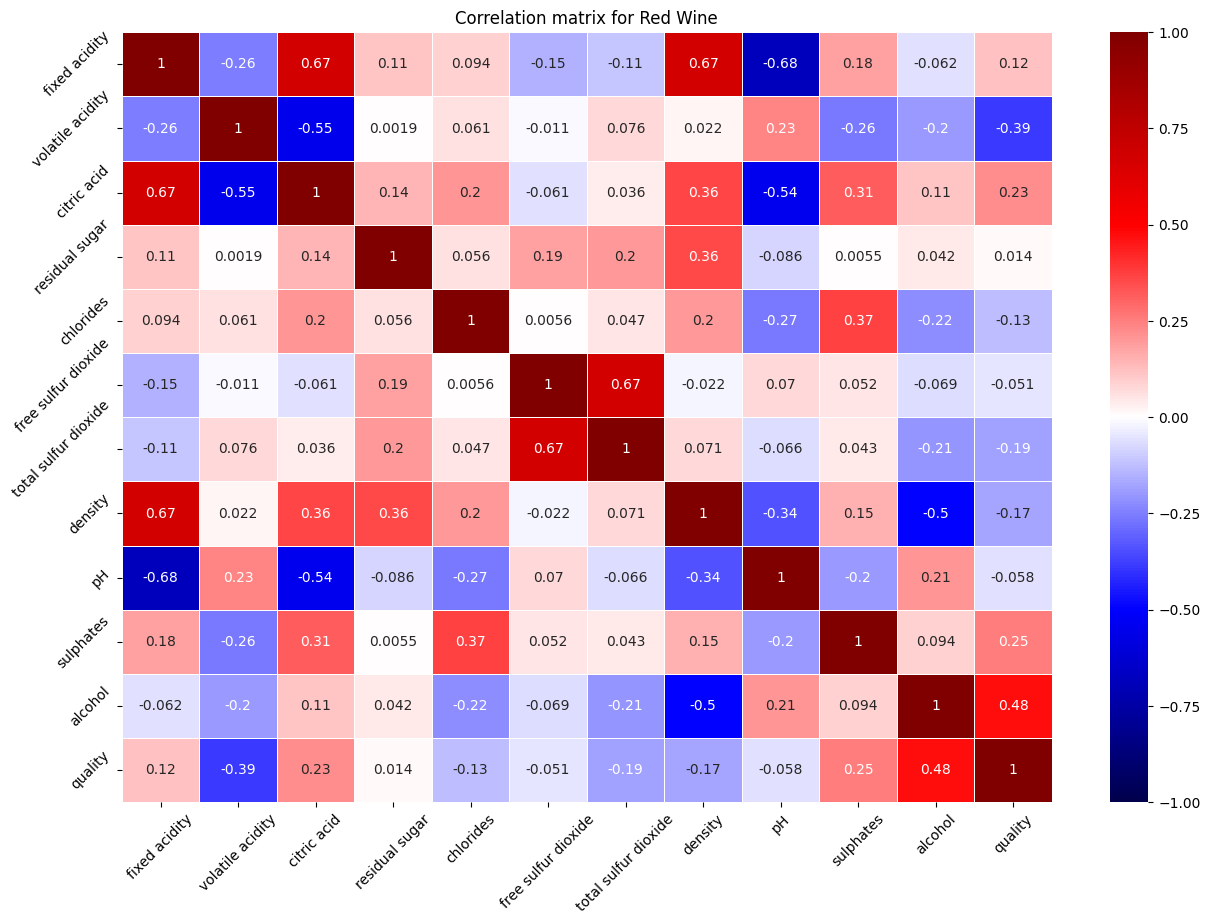

In [28]:
create_heat_map(df_red_wine)

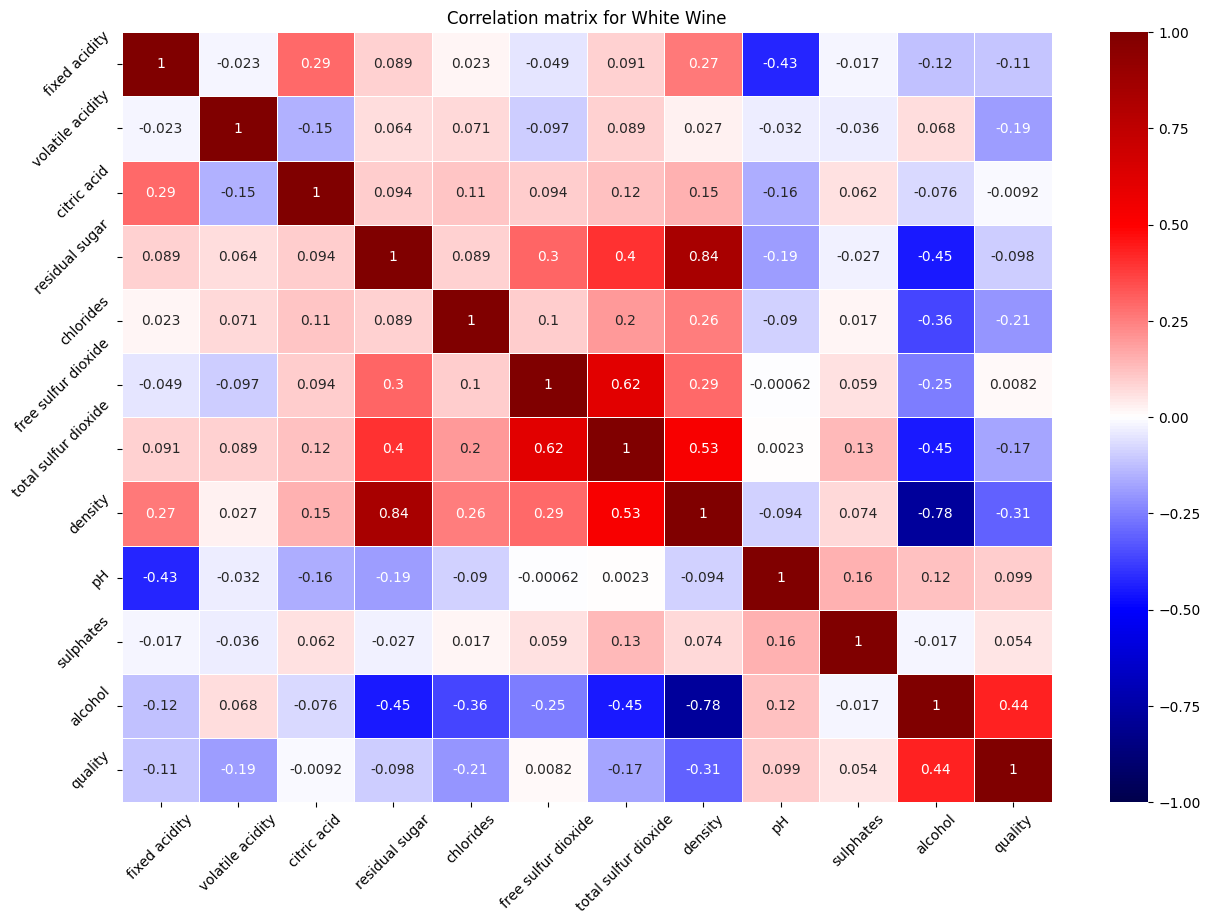

In [29]:
create_heat_map(df_white_wine)

**Observations from the heatmap**

1. **White Wine**:
   - Alcohol and Quality(0.44): Alcohol may enhance quality.
   - Density and Quality(-0.31): Density may decrease quality.
2. **Red Wine**:
   - Alcohol and Quality(0.48): Alcohol may enhance quality.
   - Volatile Acidity and Quality(-0.39): Volatile Acidity may decrease quality.
   - Sulphates and Quality(0.25): Sulphates may inhance quality.
3. **Conclusion**:
   - While both wine models will focus on alcohol,they may differ from specific features.

In [30]:
white_wine_log_columns = [
    'chlorides',
    'volatile acidity',
    'citric acid',
    'residual sugar',
    'free sulfur dioxide'
]

red_wine_log_columns = [
    'residual sugar',
    'chlorides',
    'free sulfur dioxide',
    'total sulfur dioxide',
    'sulphates'
]

In [31]:
def log_transform(data):
    return np.log(data+1)

def log_transform_wine_data(wine_type_df):
    wine_type = get_wine_str(wine_type_df)
    log_wine_df = wine_type_df.copy()

    if wine_type == "Red Wine":
        columns = red_wine_log_columns.copy()
    elif wine_type == "White Wine":
        columns = white_wine_log_columns.copy()

    for col in log_wine_df.columns:
        if col in columns:
            log_wine_df[col] = log_transform(log_wine_df[col])
    
    return log_wine_df

In [32]:
log_red_wine_df = log_transform_wine_data(df_red_wine)

log_white_wine_df = log_transform_wine_data(df_white_wine)

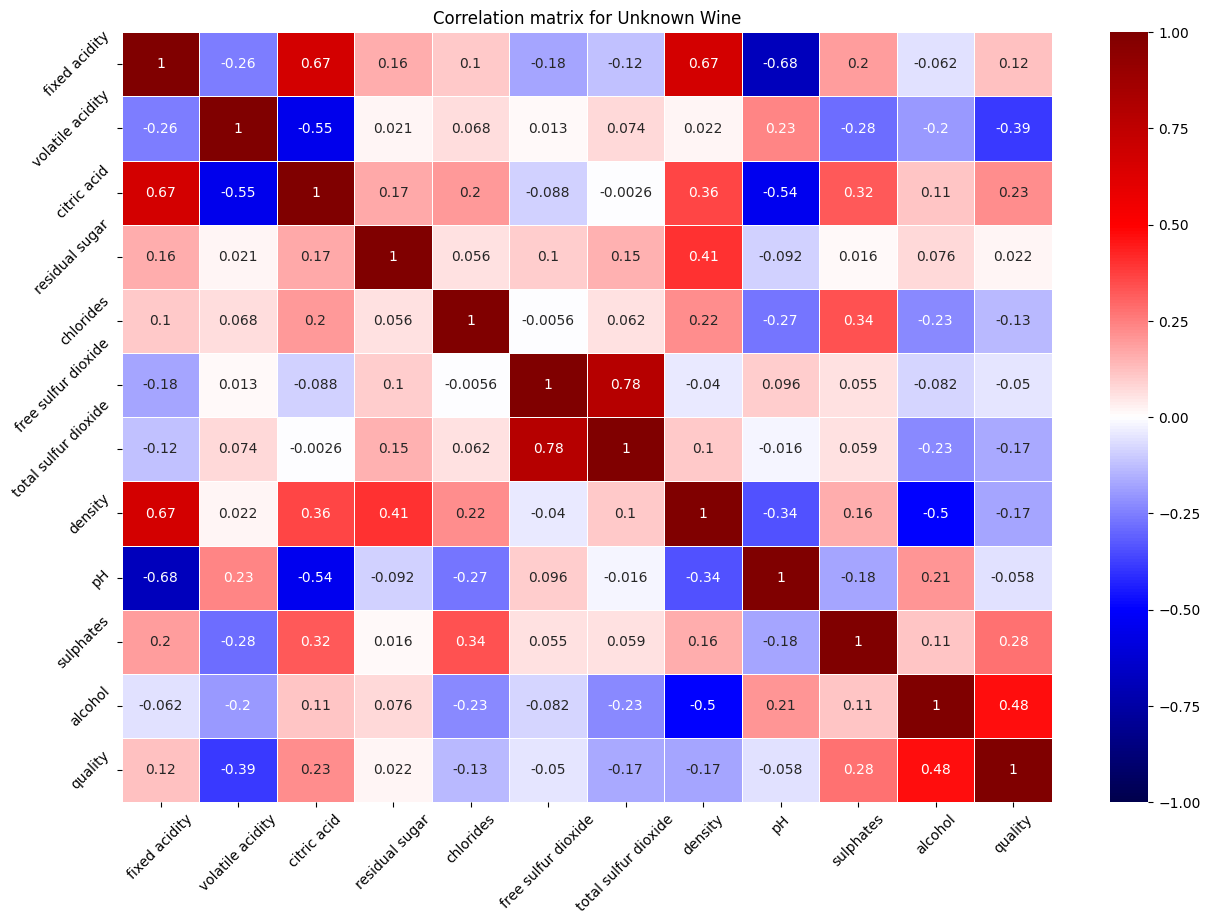

In [33]:
create_heat_map(log_red_wine_df)

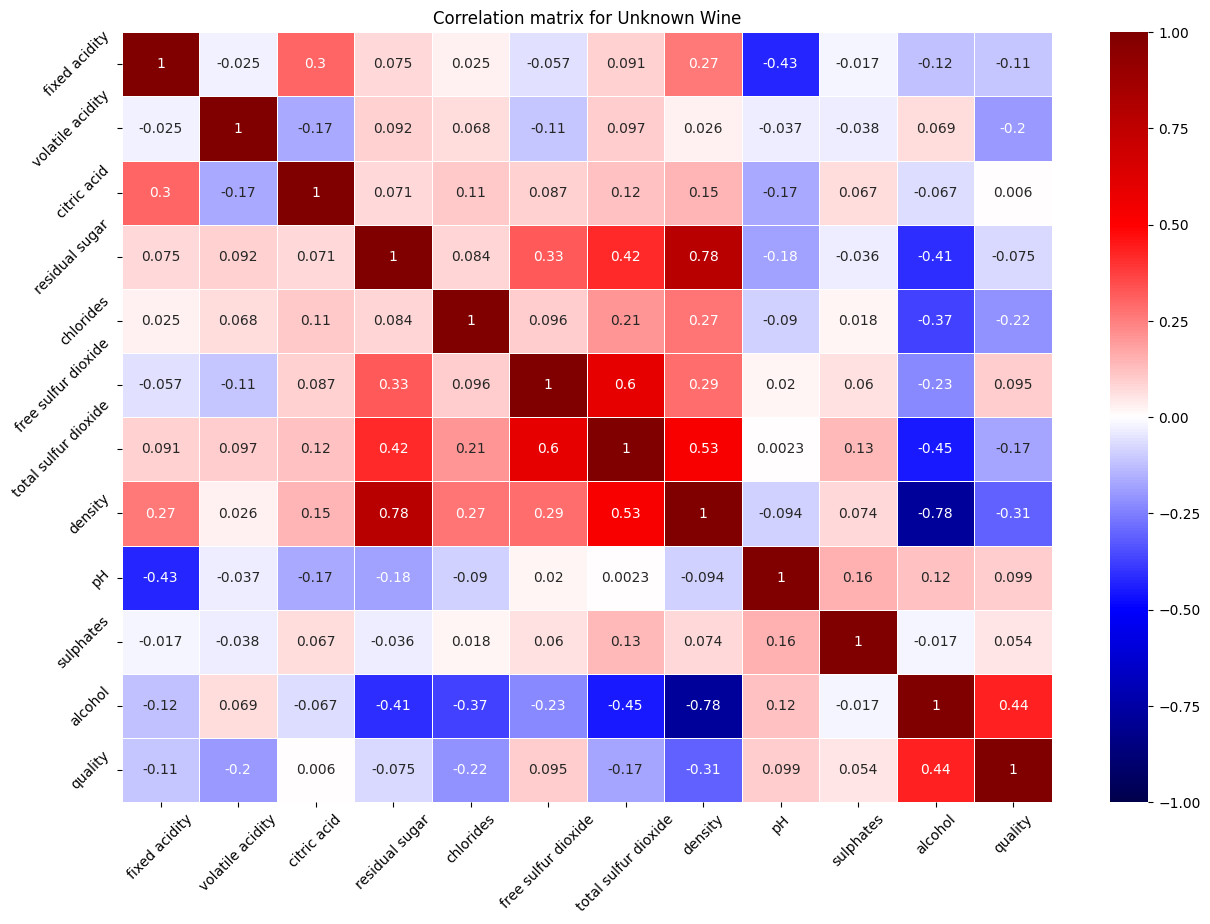

In [34]:
create_heat_map(log_white_wine_df)

**Observations from heatmap(using log transformation on certain columns)**

1. **White Wine**:

2. **Red Wine**:

3. **Conclusion**:


### Clustermaps
observe relationships between features

<Figure size 1500x1500 with 0 Axes>

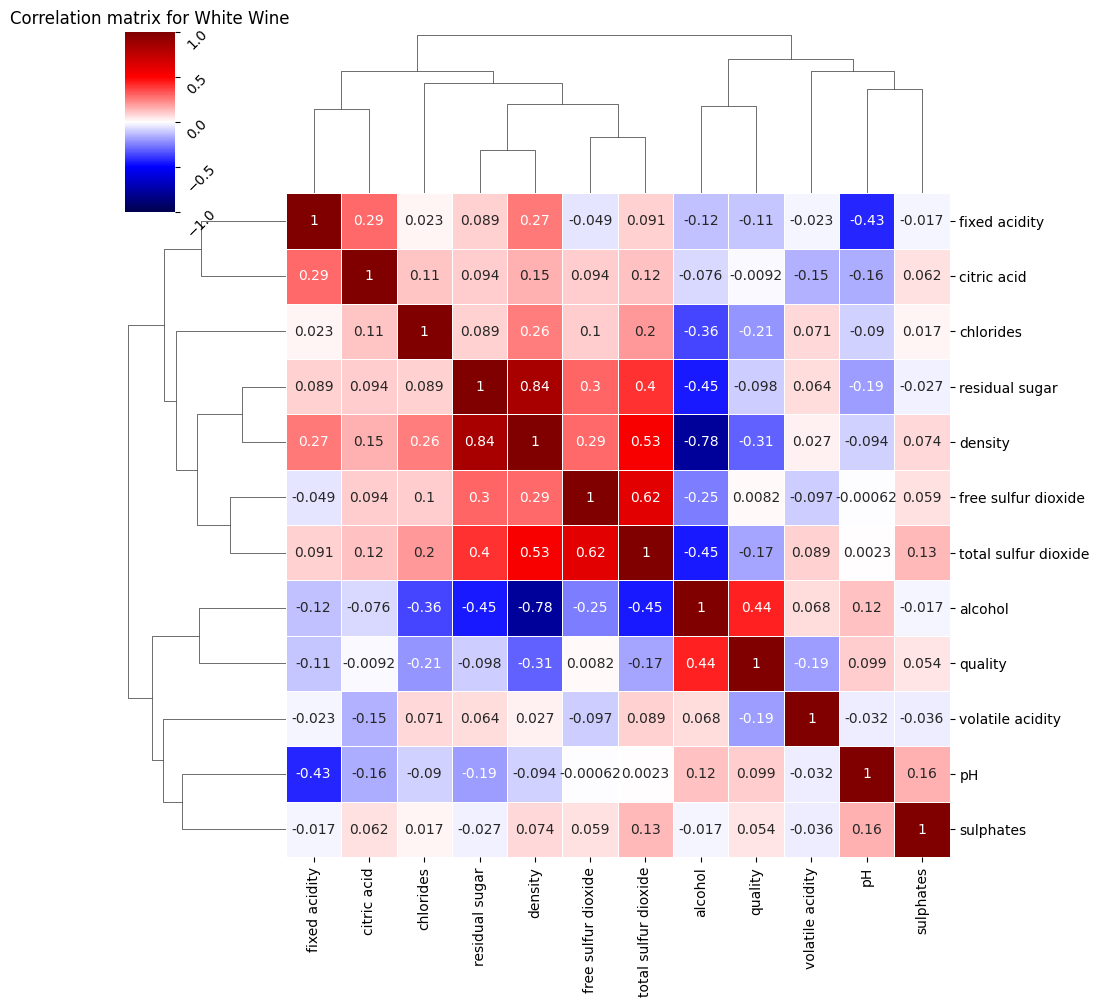

In [35]:
create_clustermap(df_white_wine)

<Figure size 1500x1500 with 0 Axes>

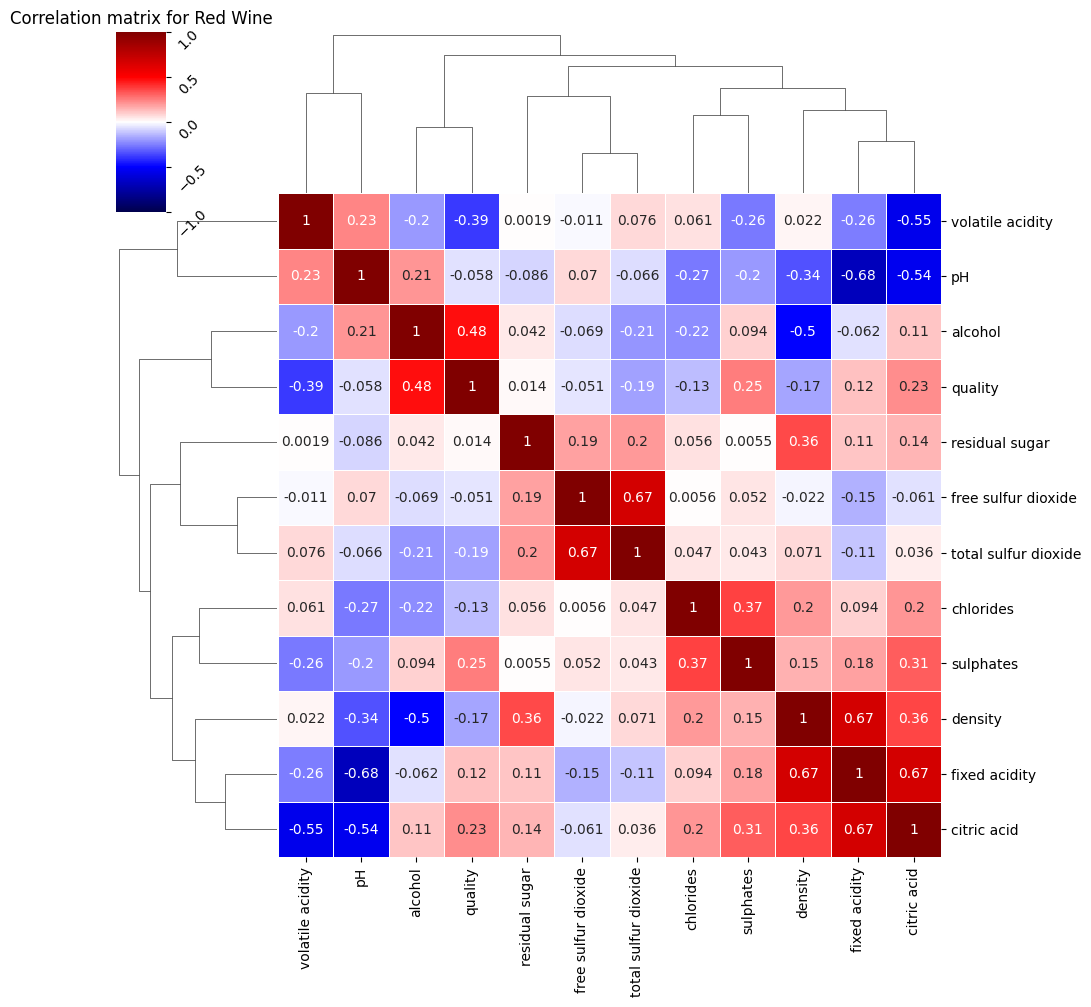

In [36]:
create_clustermap(df_red_wine)

**Conclusions from the clustermaps**

- Features that have high correlation between each other but low correlation with *quality* can be used to reduced dementions of our data  (We can use PCA to identyfe as many features we need)

### Selecting the most importnat features for **quality** prediction using top K features 

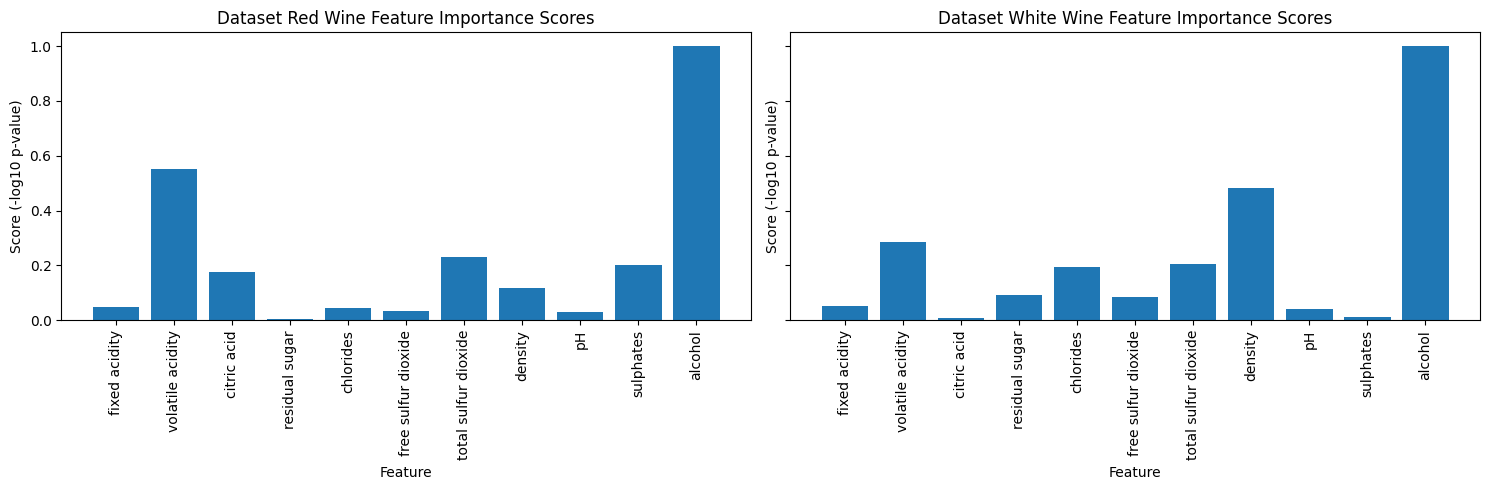

In [63]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest, f_classif

def visualize_feature_importance(datasets, names, k=5):
    num_datasets = len(datasets)

    # Create subplots
    fig, axes = plt.subplots(1, num_datasets, figsize=(15, 5), sharey=True)

    for i, (X, y) in enumerate(datasets):
        selector = SelectKBest(score_func=f_classif, k=k)
        X_new = selector.fit_transform(X, y)

        # Visualize the scores of features
        scores = -np.log10(selector.pvalues_)
        scores /= scores.max()

        # Plotting the bar plot for each dataset
        axes[i].bar(range(X.shape[1]), scores, tick_label=X.columns.values.tolist())
        axes[i].set_xticks(range(X.shape[1]))
        axes[i].set_xticklabels(X.columns.values.tolist(), rotation=90)
        axes[i].set_xlabel('Feature')
        axes[i].set_ylabel('Score (-log10 p-value)')
        axes[i].set_title(f'Dataset {names[i]} Feature Importance Scores')

    plt.tight_layout()
    plt.show()

# Example usage with two datasets (red wine and white wine)
datasets = [
    (df_red_wine.drop(columns=['quality']), df_red_wine['quality']),
    (df_white_wine.drop(columns=['quality']), df_white_wine['quality'])
]

visualize_feature_importance(datasets, ['Red Wine', 'White Wine'], k=5)


## Visualize Data

1) Quality distribiution based on the wine type (color)

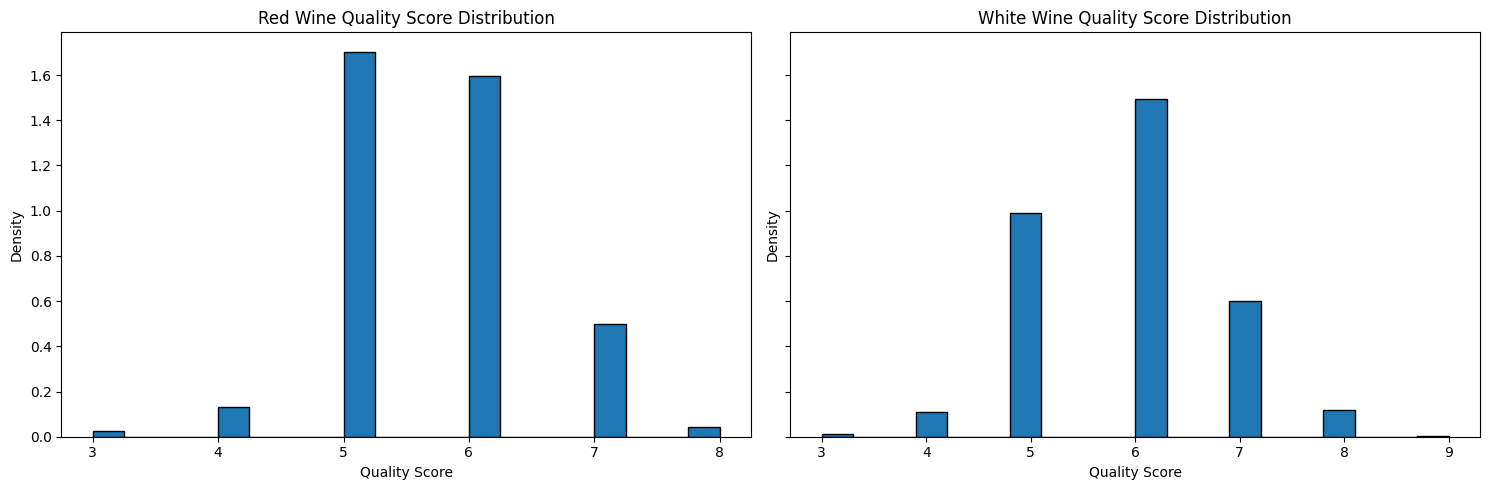

In [71]:
def visualize_quality_histogram(datasets):
    num_datasets = len(datasets)

    # Create subplots
    fig, axes = plt.subplots(1, num_datasets, figsize=(15, 5), sharey=True)

    for i, (df, name) in enumerate(datasets):
        quality_column = df['quality']
        axes[i].hist(quality_column, bins=20, edgecolor='black', density = True)
        axes[i].set_xlabel('Quality Score')
        axes[i].set_ylabel('Density')
        axes[i].set_title(f'{name} Quality Score Distribution')

    plt.tight_layout()
    plt.show()

# Example usage with two datasets (red wine and white wine)
datasets = [
    (df_red_wine, 'Red Wine'),
    (df_white_wine, 'White Wine')
]

visualize_quality_histogram(datasets)


## Significant Statement

## Conclusion & Discussions